In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('/content/Corona_NLP_train.csv',encoding='latin-1')
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [4]:
df.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


(-0.5, 399.5, 199.5, -0.5)

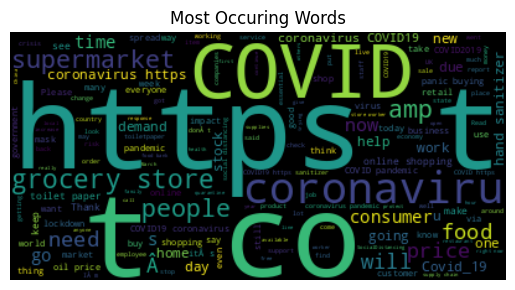

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(df['OriginalTweet'])
wordcloud = WordCloud( max_words=500).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Occuring Words")
plt.axis("off")

Text(0.5, 1.0, 'Sentiment Count')

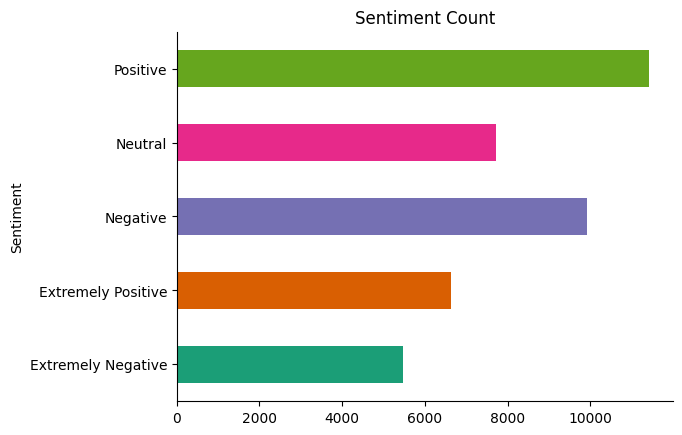

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh',color= sns.color_palette('Dark2'))
plt.gca().spines[['top','right']].set_visible(False)
plt.title('Sentiment Count')

In [7]:
for i in range(13):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j




#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n
As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU
Cashier at grocery store was sharing his insights on 

In [8]:
import re
df['CleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'[^a-zA-z0-9]+', ' ', x))
df['CleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'http\S+', ' ', x))


In [9]:
df.head()


,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [10]:
for i in range(13):
  print(df['CleanOriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv   and   and  
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak  





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral  




#CoronavirusFrance #restezchezvous #StayAtHome #confinement  
As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports  
Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I'm in Civics class so I know what I'm talking about".  


#toiletpapercrisis #covid_19  
Due to COVID-19

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
for i in range(13):
  print(df['CleanOriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv
advice Talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist GP set online shopping accounts poss adequate supplies regular meds order
Coronavirus Australia: Woolworths give elderly, disabled dedicated shopping hours amid COVID-19 outbreak
My food stock one empty... PLEASE, panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE take need. Stay calm, stay safe. #COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral
Me, ready go supermarket #COVID19 outbreak. Not I'm paranoid, food stock litteraly empty. The #coronavirus serious thing, please, panic. It causes shortage... #CoronavirusFrance #restezchezvous #StayAtHome #confinement
As news regionÂs first confirmed COVID-19 case came Sullivan County last week, people flocked area stores purchase cleaning supplies, hand sanitizer, food, toilet paper goods, @Tim_Dodson reports
Cashier grocery store sharing insights 

In [13]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths give elderly...
3,My food stock is not the only one which is emp...,Positive,"My food stock one empty... PLEASE, panic, THER..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready go supermarket #COVID19 outbreak. No..."


In [14]:
for i in range(13):
  print(df['CleanOriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv
advice Talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist GP set online shopping account po adequate supply regular med order
Coronavirus Australia: Woolworths give elderly, disabled dedicated shopping hour amid COVID-19 outbreak
My food stock one empty... PLEASE, panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE take need. Stay calm, stay safe. #COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral
Me, ready go supermarket #COVID19 outbreak. Not I'm paranoid, food stock litteraly empty. The #coronavirus serious thing, please, panic. It cause shortage... #CoronavirusFrance #restezchezvous #StayAtHome #confinement
As news regionÂs first confirmed COVID-19 case came Sullivan County last week, people flocked area store purchase cleaning supplies, hand sanitizer, food, toilet paper goods, @Tim_Dodson report
Cashier grocery store sharing insight #Covid_19 To pro

In [15]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()

,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ..."
3,My food stock is not the only one which is emp...,Positive,"my food stock one empty... please, panic, ther..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak. no..."


In [16]:
for i in range(13):
  print(df['OriginalTweet'][i])
  print(df['CleanOriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
@menyrbi @phil_gahan @chrisitv
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account po adequ suppli regular med order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P
coronaviru australia: woolworth give elderly, disabl dedic shop hour amid covid-19 outbreak





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
my food stock one empty... please, panic, there will be enough food for everyon take need. stay 

In [18]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[@, menyrbi, @, phil_gahan, @, chrisitv]"
1,advice Talk to your neighbours family to excha...,Positive,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronaviru, australia, :, woolworth, give, el..."
3,My food stock is not the only one which is emp...,Positive,"[my, food, stock, one, empty, ..., please, ,, ..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[me, ,, readi, go, supermarket, #, covid19, ou..."


In [21]:
def update(cat):
  if cat == "Neutral":
    return 0
  elif cat == "Positive":
    return 1
  elif cat == "Extremely Positive":
    return 2
  elif cat == "Extremely Negative":
    return -2
  elif cat == "Negative":
    return -1
  return cat
df['Sentiment'] = df['Sentiment'].apply(update)
df.head()



,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,"[@, menyrbi, @, phil_gahan, @, chrisitv]"
1,advice Talk to your neighbours family to excha...,1,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,1,"[coronaviru, australia, :, woolworth, give, el..."
3,My food stock is not the only one which is emp...,1,"[my, food, stock, one, empty, ..., please, ,, ..."
4,"Me, ready to go at supermarket during the #COV...",-2,"[me, ,, readi, go, supermarket, #, covid19, ou..."


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

X = df['CleanOriginalTweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

tfidf = TfidfVectorizer()

logisticregression = LogisticRegression()
naive_bayes = MultinomialNB()

lr = Pipeline([('tfidf', tfidf), ('Logisticregression', logisticregression)])
nb = Pipeline([('tfidf', tfidf), ('Naive_bayes', naive_bayes)])

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)

y_pred1= lr.predict(X_test)
y_pred2 = nb.predict(X_test)

accuracylr = accuracy_score(y_test, y_pred1)
accuracynb = accuracy_score(y_test, y_pred2)

print("Logistic Regression Accuracy: ", accuracylr)
print("Naive Bayes Accuracy: ", accuracynb)

AttributeError: 'list' object has no attribute 'lower'

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

X = df['CleanOriginalTweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Create pipelines
lr = Pipeline([('tfidf', tfidf), ('Logisticregression', LogisticRegression())])
nb = Pipeline([('tfidf', tfidf), ('Naive_bayes', MultinomialNB())])

# Fit the pipelines (this will handle the text data transformation)
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Make predictions
y_pred1 = lr.predict(X_test)
y_pred2 = nb.predict(X_test)

# Evaluate
accuracylr = accuracy_score(y_test, y_pred1)
accuracynb = accuracy_score(y_test, y_pred2)

print("Logistic Regression Accuracy: ", accuracylr)
print("Naive Bayes Accuracy: ", accuracynb)

AttributeError: 'list' object has no attribute 'lower'

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

X = df['CleanOriginalTweet'].apply(lambda x: ' '.join(x)) # Join the tokens back into a string
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Create pipelines
lr = Pipeline([('tfidf', tfidf), ('Logisticregression', LogisticRegression())])
nb = Pipeline([('tfidf', tfidf), ('Naive_bayes', MultinomialNB())])

# Fit the pipelines (this will handle the text data transformation)
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Make predictions
y_pred1 = lr.predict(X_test)
y_pred2 = nb.predict(X_test)

# Evaluate
accuracylr = accuracy_score(y_test, y_pred1)
accuracynb = accuracy_score(y_test, y_pred2)

print("Logistic Regression Accuracy: ", accuracylr)
print("Naive Bayes Accuracy: ", accuracynb)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy:  0.576044703595724
Naive Bayes Accuracy:  0.3746355685131195
